In [0]:
%matplotlib inline
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import torchvision
import torch.nn.functional as F
import torch.optim as opt
import time
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from torch import autograd
from torch.autograd import Variable
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

In [0]:
mb_size = 64

transform = transforms.ToTensor()

trainData = torchvision.datasets.MNIST('./data/', download=True, transform=transform, train=True)

trainLoader = torch.utils.data.DataLoader(trainData, shuffle=True, batch_size=mb_size)

In [0]:
dataIter = iter(trainLoader)

imgs, labels = dataIter.next()


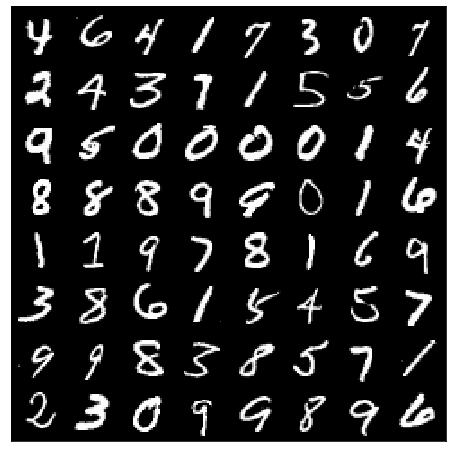

In [34]:
def imshow(imgs):
    imgs = torchvision.utils.make_grid(imgs)
    npimgs = imgs.numpy()
    plt.figure(figsize=(8,8))
    plt.imshow(np.transpose(npimgs, (1,2,0)), cmap='Greys_r')
    plt.xticks([])
    plt.yticks([])
    plt.show()

imshow(imgs)

In [35]:


Z_dim = 100
H_dim = 128
X_dim = imgs.view(imgs.size(0), -1).size(1)

print(Z_dim, H_dim, X_dim)

device = 'cuda'



100 128 784


In [0]:


class Gen(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(Z_dim, H_dim),
            nn.ReLU(),
            nn.Linear(H_dim, X_dim),
            nn.Sigmoid()
        )
          
    def forward(self, input):
        return self.model(input)


G = Gen().to(device)

In [0]:
class Dis(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(X_dim, H_dim),
            nn.ReLU(),
            nn.Linear(H_dim, 1),
            nn.Sigmoid()
        )
        
    def forward(self, input):
        return self.model(input)

In [0]:
D = Dis().to(device)

In [0]:
lr = 1e-3

g_opt = opt.Adam(G.parameters(), lr=lr)
d_opt = opt.Adam(D.parameters(), lr=lr)

Epoch:0,   G_loss:5.21325716814761,    D_loss:0.1308688981764352


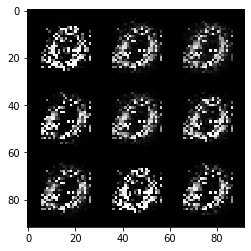

Epoch:1,   G_loss:4.508363602003818,    D_loss:0.09811250853842732


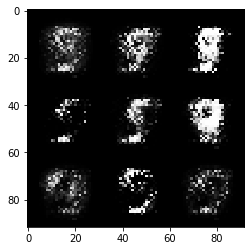

Epoch:2,   G_loss:4.627635399161625,    D_loss:0.19010028544900767


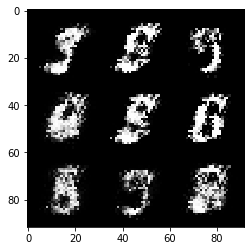

Epoch:3,   G_loss:4.2248145130905765,    D_loss:0.2376867384592226


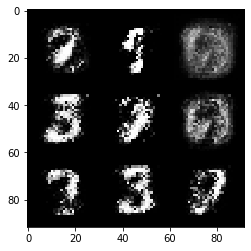

Epoch:4,   G_loss:3.6335664741011824,    D_loss:0.4159134353465363


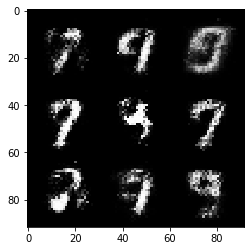

Epoch:5,   G_loss:3.170366417370371,    D_loss:0.5572260839503203


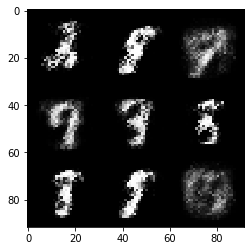

Epoch:6,   G_loss:2.9144418908080567,    D_loss:0.721250296909926


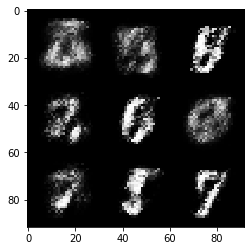

Epoch:7,   G_loss:2.9332828441662575,    D_loss:0.7191680437847495


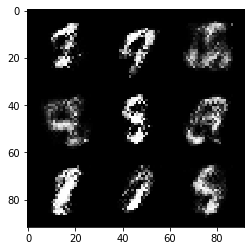

Epoch:8,   G_loss:2.7673162473544384,    D_loss:0.8438230766606992


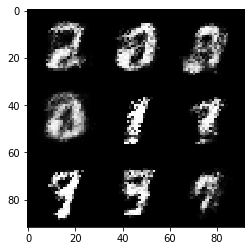

Epoch:9,   G_loss:2.515769583075794,    D_loss:0.9336853387958205


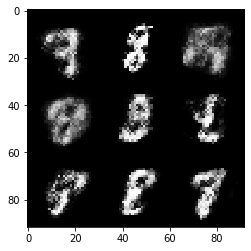

Epoch:10,   G_loss:2.4322035331715908,    D_loss:0.9674222373060072


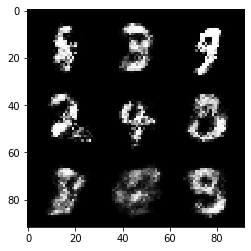

Epoch:11,   G_loss:2.312530487203903,    D_loss:0.9029188701021138


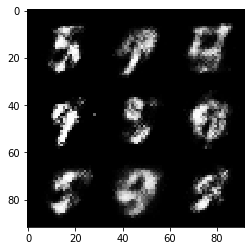

Epoch:12,   G_loss:2.227083266798113,    D_loss:0.8911091859406753


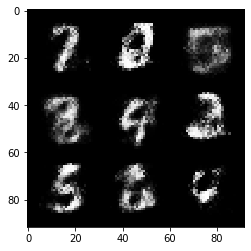

Epoch:13,   G_loss:2.214324339112239,    D_loss:0.9304544528537213


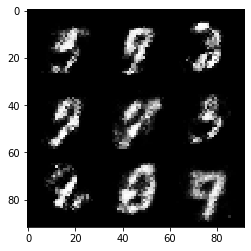

Epoch:14,   G_loss:2.1635988707989773,    D_loss:0.939461293187477


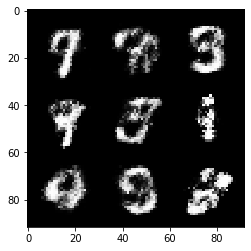

Epoch:15,   G_loss:2.10218013095449,    D_loss:0.9337322356413676


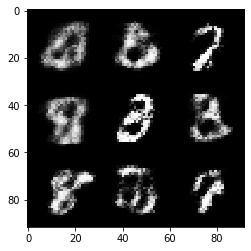

Epoch:16,   G_loss:1.9701001802995515,    D_loss:0.9506474967831487


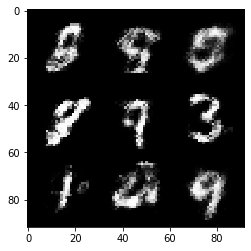

Epoch:17,   G_loss:1.976532798840293,    D_loss:0.9616034963746061


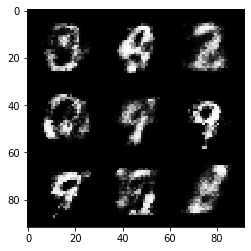

Epoch:18,   G_loss:1.8848062404183183,    D_loss:0.963337724524012


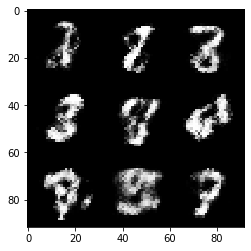

Epoch:19,   G_loss:1.8458215425263589,    D_loss:0.9666108177033569


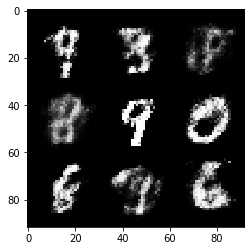

Epoch:20,   G_loss:1.758956365620912,    D_loss:0.9729607640934397


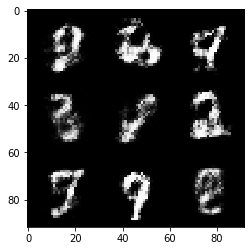

Epoch:21,   G_loss:1.753289191199264,    D_loss:0.9673194480158372


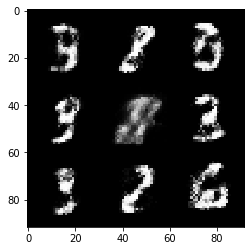

Epoch:22,   G_loss:1.7359690718305136,    D_loss:0.9778617189001682


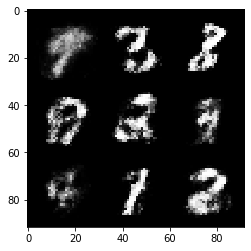

Epoch:23,   G_loss:1.7127745896260114,    D_loss:0.9433206605758748


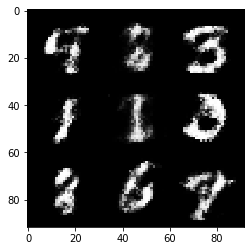

Epoch:24,   G_loss:1.6943194733372628,    D_loss:0.9494569987249273


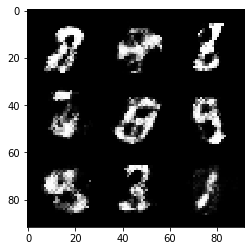

Epoch:25,   G_loss:1.717422721609632,    D_loss:0.9466356079715655


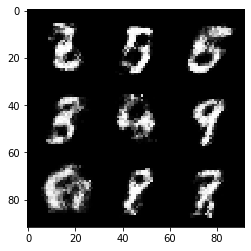

Epoch:26,   G_loss:1.7183317210374356,    D_loss:0.9279699143189103


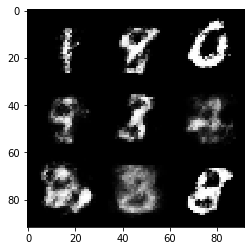

Epoch:27,   G_loss:1.6893677860180707,    D_loss:0.9355864226818085


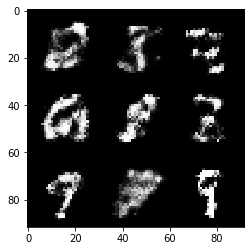

Epoch:28,   G_loss:1.7442062652187307,    D_loss:0.9293250845693576


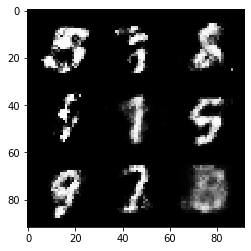

Epoch:29,   G_loss:1.6942121343317824,    D_loss:0.9526363470152751


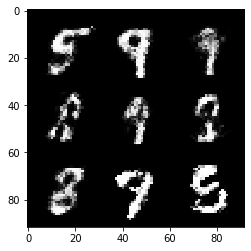

Epoch:30,   G_loss:1.7049937943405689,    D_loss:0.937619402146797


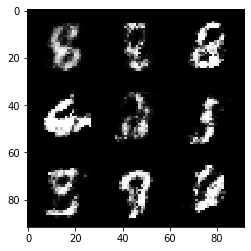

Epoch:31,   G_loss:1.7016438549515536,    D_loss:0.9487132728735267


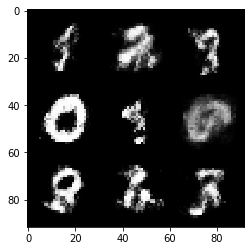

Epoch:32,   G_loss:1.7058650822654715,    D_loss:0.9416754891369135


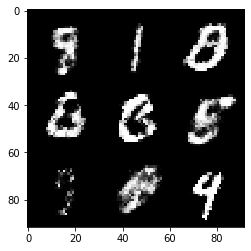

Epoch:33,   G_loss:1.6974012948302573,    D_loss:0.9346054648793837


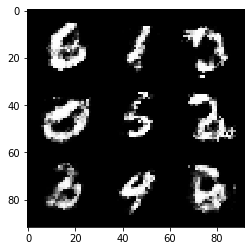

Epoch:34,   G_loss:1.7103037199994395,    D_loss:0.9426354405595295


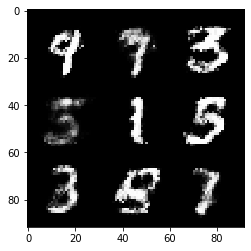

Epoch:35,   G_loss:1.6958306772368295,    D_loss:0.9459432596082626


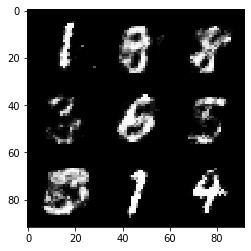

Epoch:36,   G_loss:1.6873027495483854,    D_loss:0.930780832637856


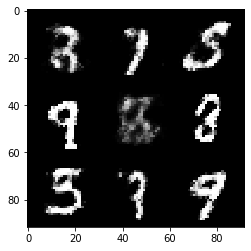

Epoch:37,   G_loss:1.7012544743287792,    D_loss:0.9253206062418565


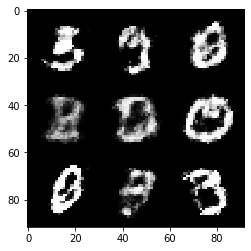

Epoch:38,   G_loss:1.6838041421955328,    D_loss:0.9354896257554036


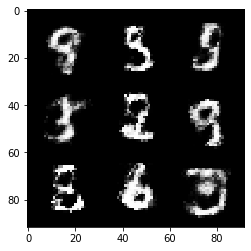

Epoch:39,   G_loss:1.6719206487700375,    D_loss:0.9321652482440477


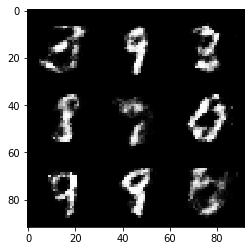

Epoch:40,   G_loss:1.6672305321134229,    D_loss:0.9275632672853815


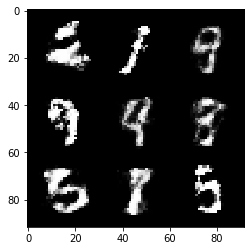

Epoch:41,   G_loss:1.6733968585793144,    D_loss:0.9226215545937959


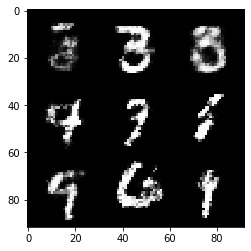

Epoch:42,   G_loss:1.680581721415652,    D_loss:0.9248056985549072


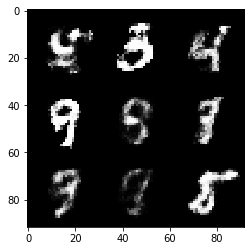

Epoch:43,   G_loss:1.6352901058410532,    D_loss:0.9257682451942583


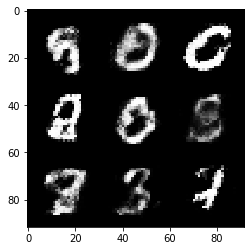

Epoch:44,   G_loss:1.6743852817681806,    D_loss:0.9181127158055173


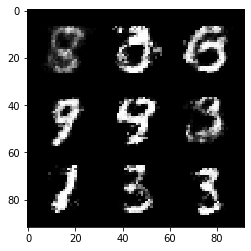

Epoch:45,   G_loss:1.6662785856962712,    D_loss:0.9105460341932423


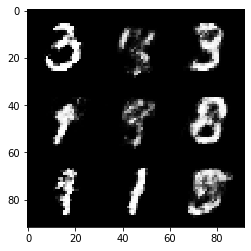

Epoch:46,   G_loss:1.6453736308795304,    D_loss:0.9140334138229712


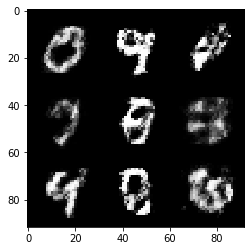

Epoch:47,   G_loss:1.6546263974358533,    D_loss:0.9098018607351063


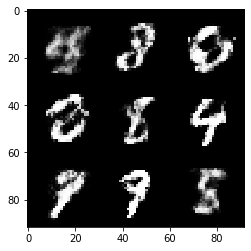

Epoch:48,   G_loss:1.657641314113064,    D_loss:0.9064907772835892


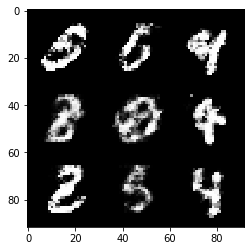

Epoch:49,   G_loss:1.6523177758462901,    D_loss:0.9052049572915156


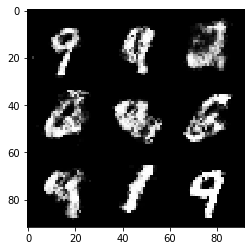

Epoch:50,   G_loss:1.6536384249038534,    D_loss:0.9140644764213928


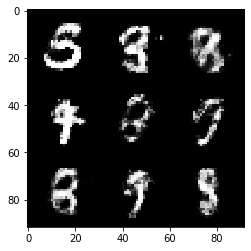

Epoch:51,   G_loss:1.6230419897067268,    D_loss:0.9073917835251863


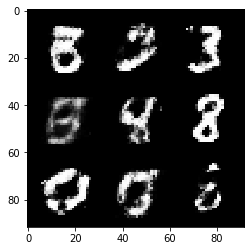

Epoch:52,   G_loss:1.6291789224407058,    D_loss:0.9086791759233739


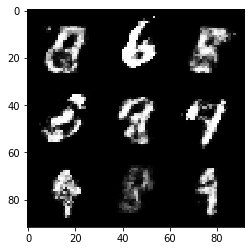

Epoch:53,   G_loss:1.6203494515500343,    D_loss:0.9033802660670616


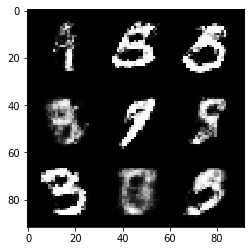

Epoch:54,   G_loss:1.6377495825926125,    D_loss:0.8992834070216872


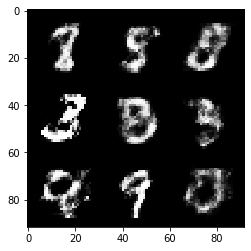

Epoch:55,   G_loss:1.6447806646828966,    D_loss:0.8941124183282669


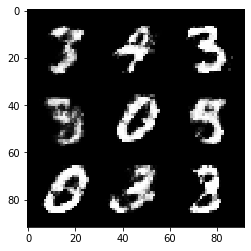

Epoch:56,   G_loss:1.6312150798880978,    D_loss:0.8939091889842995


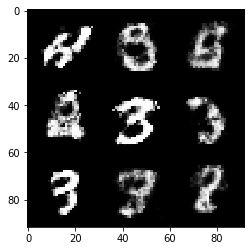

Epoch:57,   G_loss:1.6382281176571145,    D_loss:0.8889833571178827


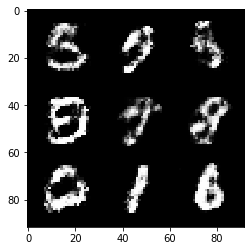

Epoch:58,   G_loss:1.6491598682617075,    D_loss:0.8838717389716777


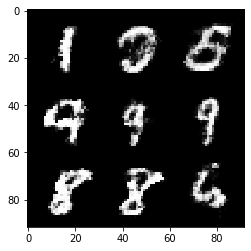

Epoch:59,   G_loss:1.6661331582425245,    D_loss:0.8802965529310678


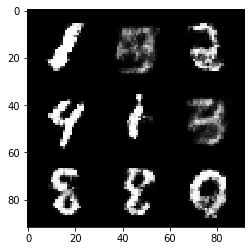

Epoch:60,   G_loss:1.6873023482019713,    D_loss:0.882422354493314


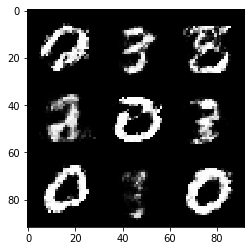

Epoch:61,   G_loss:1.6695435189489107,    D_loss:0.885394023171366


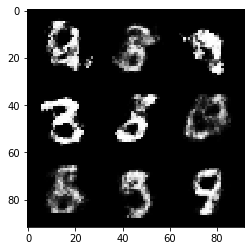

Epoch:62,   G_loss:1.6790397267605959,    D_loss:0.8765382237398802


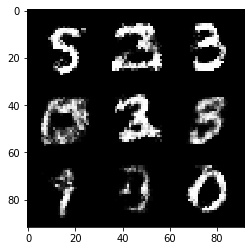

Epoch:63,   G_loss:1.6802946987436778,    D_loss:0.870557067808566


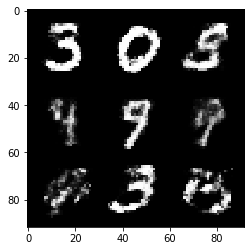

Epoch:64,   G_loss:1.6978546299659876,    D_loss:0.8724468918497374


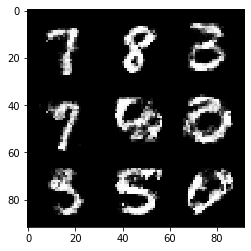

Epoch:65,   G_loss:1.6739795560013258,    D_loss:0.8705054781457254


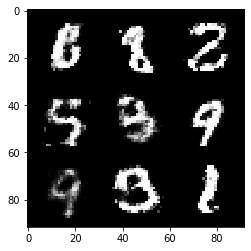

Epoch:66,   G_loss:1.689992503189583,    D_loss:0.8630285578241734


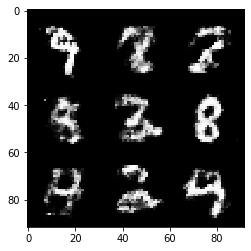

Epoch:67,   G_loss:1.7104871161202633,    D_loss:0.8614601203119323


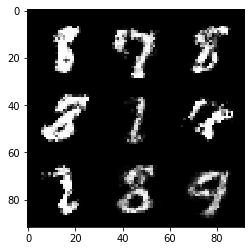

Epoch:68,   G_loss:1.6910222654403655,    D_loss:0.8617942860639934


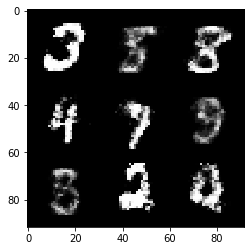

Epoch:69,   G_loss:1.7054052712566563,    D_loss:0.8585665326382814


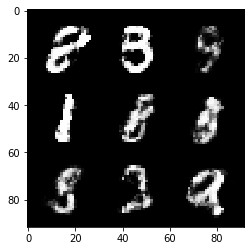

Epoch:70,   G_loss:1.7092864578212503,    D_loss:0.8533110805411837


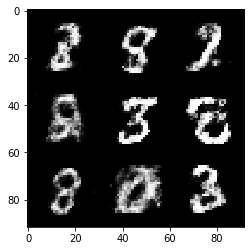

Epoch:71,   G_loss:1.7011570838977024,    D_loss:0.8504617194504117


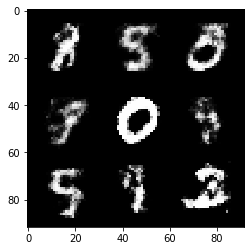

Epoch:72,   G_loss:1.717984375287729,    D_loss:0.844367318951499


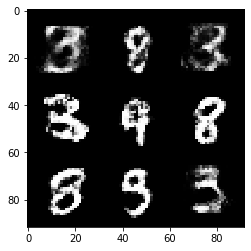

Epoch:73,   G_loss:1.728657894297195,    D_loss:0.8411433295146235


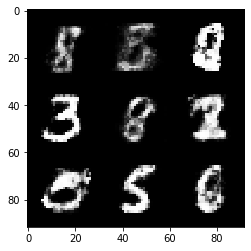

Epoch:74,   G_loss:1.7118611601369975,    D_loss:0.8445162768048773


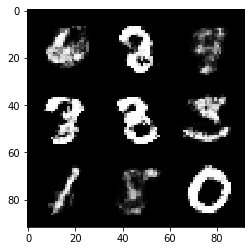

Epoch:75,   G_loss:1.7184204690491975,    D_loss:0.8349304767941107


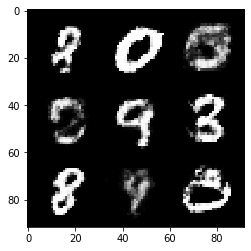

Epoch:76,   G_loss:1.728849466167279,    D_loss:0.8329025832320581


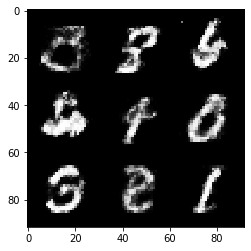

Epoch:77,   G_loss:1.7418984737731755,    D_loss:0.8335303906311613


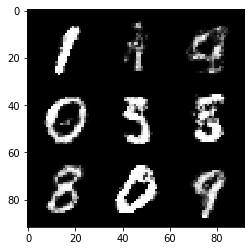

Epoch:78,   G_loss:1.7450343949962526,    D_loss:0.8230644703419732


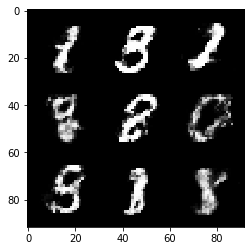

Epoch:79,   G_loss:1.7490072230032003,    D_loss:0.8142438222731608


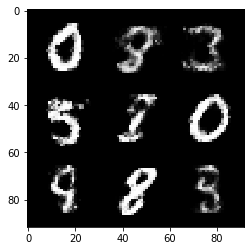

Epoch:80,   G_loss:1.7543048900581881,    D_loss:0.8220798926058609


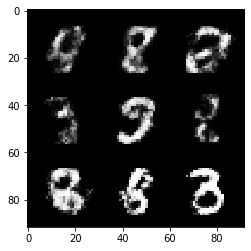

Epoch:81,   G_loss:1.7668095195471352,    D_loss:0.8135829238749263


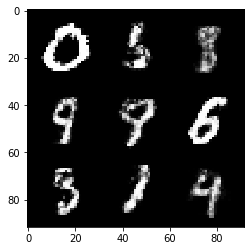

Epoch:82,   G_loss:1.7738932822304747,    D_loss:0.8070426024099403


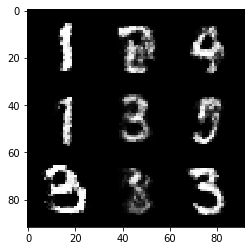

Epoch:83,   G_loss:1.7713146465165275,    D_loss:0.8027778282475624


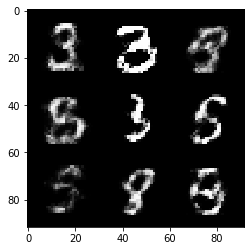

Epoch:84,   G_loss:1.7821230235130294,    D_loss:0.7999422813592943


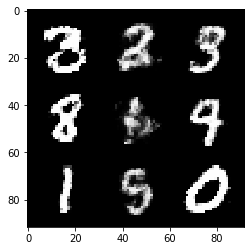

Epoch:85,   G_loss:1.7847171880797283,    D_loss:0.7954455607735527


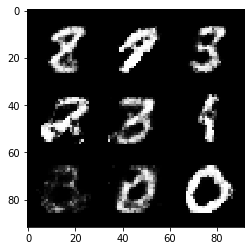

Epoch:86,   G_loss:1.7925066534898428,    D_loss:0.7888060714136055


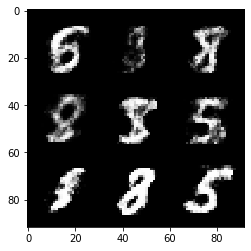

Epoch:87,   G_loss:1.8131188773143012,    D_loss:0.7895952791674559


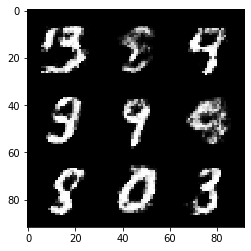

Epoch:88,   G_loss:1.81819967483915,    D_loss:0.778834102949354


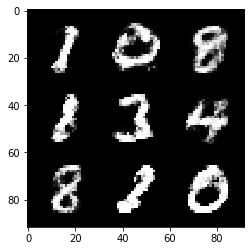

Epoch:89,   G_loss:1.8182573932320325,    D_loss:0.7770893842236065


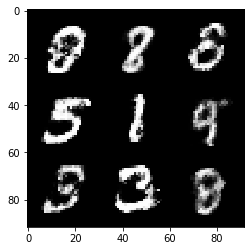

Epoch:90,   G_loss:1.8426931594480584,    D_loss:0.7744814945118768


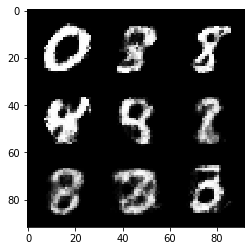

Epoch:91,   G_loss:1.8338827950868017,    D_loss:0.7704172217642574


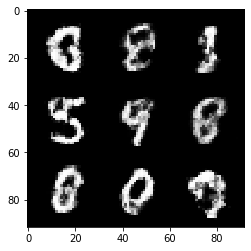

Epoch:92,   G_loss:1.8511833807806979,    D_loss:0.7781460214017043


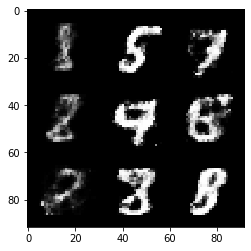

Epoch:93,   G_loss:1.8307519698702197,    D_loss:0.7722626934681874


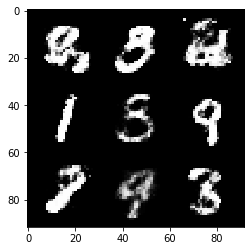

Epoch:94,   G_loss:1.8481898775487058,    D_loss:0.7593487119242581


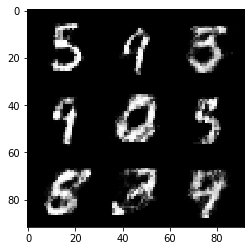

Epoch:95,   G_loss:1.8660674454815098,    D_loss:0.7653422759794223


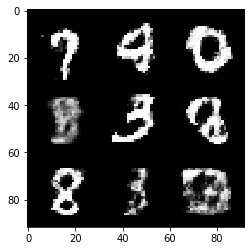

Epoch:96,   G_loss:1.878776285058654,    D_loss:0.7561761196742434


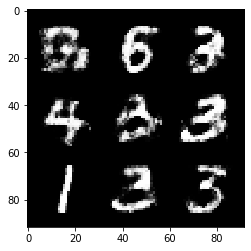

Epoch:97,   G_loss:1.870721052958767,    D_loss:0.7484331628534077


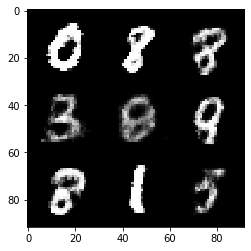

Epoch:98,   G_loss:1.9011569232828835,    D_loss:0.7453979446943889


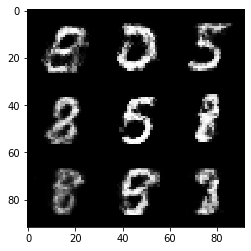

Epoch:99,   G_loss:1.907827624379953,    D_loss:0.744547019762271


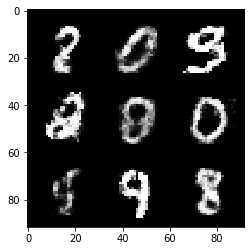

Epoch:100,   G_loss:1.9167653162087968,    D_loss:0.7454039013144304


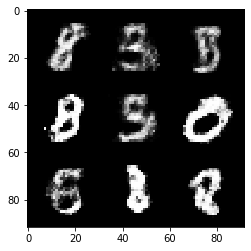

Epoch:101,   G_loss:1.9158246740857676,    D_loss:0.7358132548042452


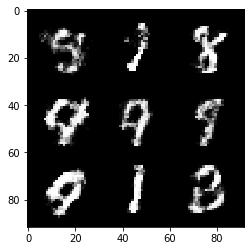

Epoch:102,   G_loss:1.9369492152098144,    D_loss:0.7320446325644755


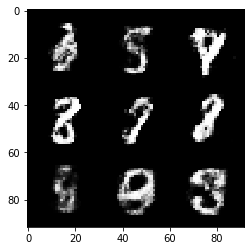

Epoch:103,   G_loss:1.9475832882720525,    D_loss:0.7321976809295764


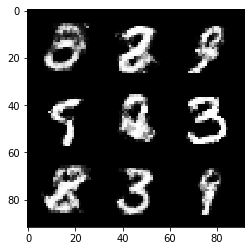

Epoch:104,   G_loss:1.9499682513381373,    D_loss:0.7331849319467159


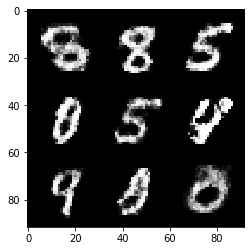

Epoch:105,   G_loss:1.9406546961778262,    D_loss:0.7278205181744053


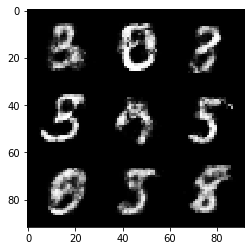

Epoch:106,   G_loss:1.9552357552656487,    D_loss:0.7223248707968543


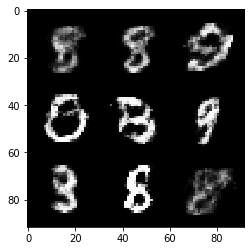

Epoch:107,   G_loss:1.956632379402738,    D_loss:0.7265225059823441


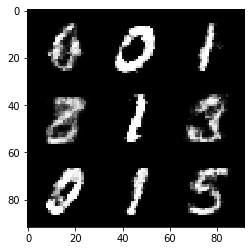

Epoch:108,   G_loss:1.9557959389076558,    D_loss:0.7262184572562989


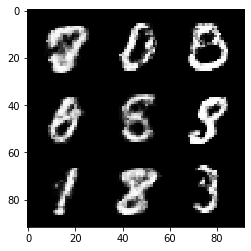

Epoch:109,   G_loss:1.966288918116962,    D_loss:0.7210016483500568


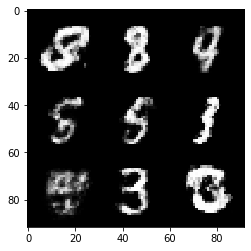

Epoch:110,   G_loss:1.993085484514867,    D_loss:0.7110530368999631


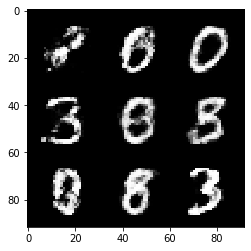

Epoch:111,   G_loss:1.994922980570844,    D_loss:0.7093591980461372


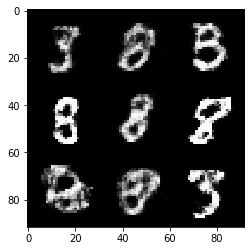

Epoch:112,   G_loss:1.9942016914200935,    D_loss:0.7115489982846958


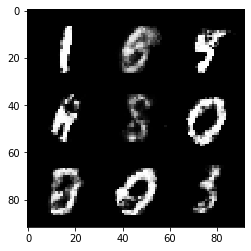

Epoch:113,   G_loss:2.0106520290567933,    D_loss:0.7002191774562986


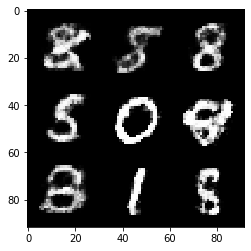

Epoch:114,   G_loss:2.0200607846540684,    D_loss:0.6976980071332155


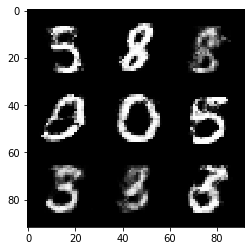

Epoch:115,   G_loss:2.026086758194702,    D_loss:0.6977383052743574


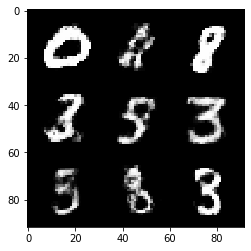

Epoch:116,   G_loss:2.032483236113591,    D_loss:0.6939860371066563


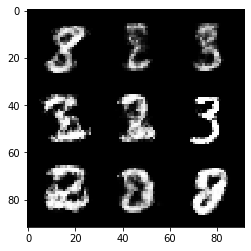

Epoch:117,   G_loss:2.022112289979768,    D_loss:0.6867349447090743


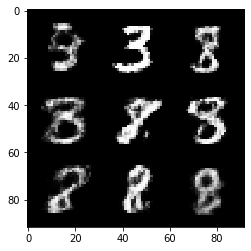

Epoch:118,   G_loss:2.034842486447617,    D_loss:0.6863017862539555


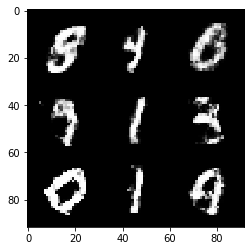

Epoch:119,   G_loss:2.050480591589962,    D_loss:0.6816241412020442


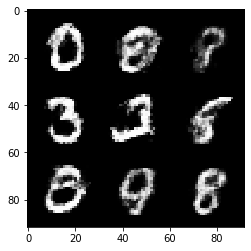

Epoch:120,   G_loss:2.0500519808167335,    D_loss:0.684574852842512


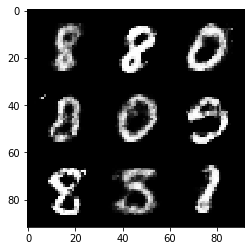

Epoch:121,   G_loss:2.0504479964913083,    D_loss:0.6883898589339084


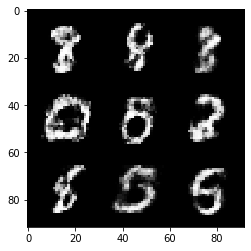

Epoch:122,   G_loss:2.0550754545594074,    D_loss:0.6854006535272354


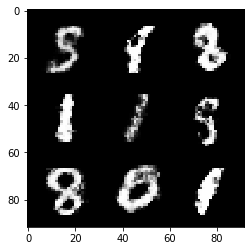

Epoch:123,   G_loss:2.054902090192604,    D_loss:0.6816847064792474


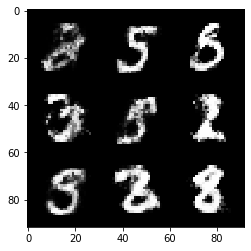

Epoch:124,   G_loss:2.063320747443608,    D_loss:0.6753689320420405


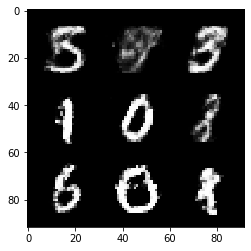

Epoch:125,   G_loss:2.06203727528993,    D_loss:0.6725282324021304


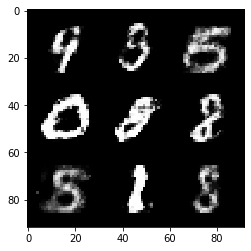

Epoch:126,   G_loss:2.054499891775249,    D_loss:0.6740059912649553


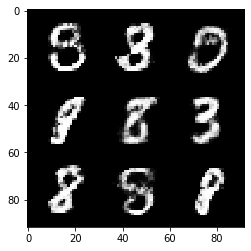

Epoch:127,   G_loss:2.079749180309808,    D_loss:0.6669519510604679


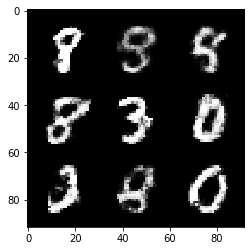

Epoch:128,   G_loss:2.0858609126066603,    D_loss:0.664215966042425


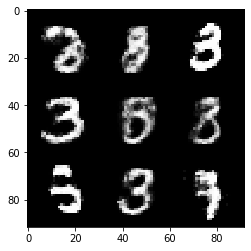

Epoch:129,   G_loss:2.0698697143780396,    D_loss:0.6674338502606858


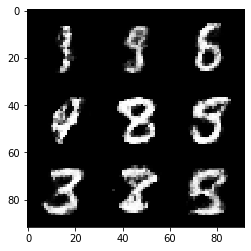

Epoch:130,   G_loss:2.109753498009273,    D_loss:0.6625957311407081


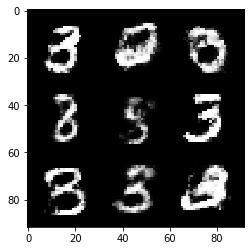

Epoch:131,   G_loss:2.0959984530518048,    D_loss:0.6609690322487085


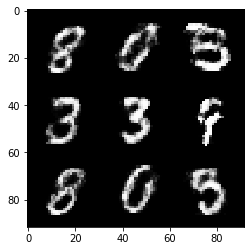

Epoch:132,   G_loss:2.0964927727988028,    D_loss:0.6526226464873438


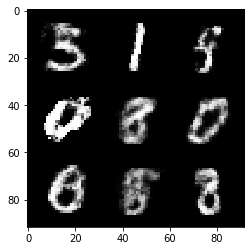

Epoch:133,   G_loss:2.11540175323039,    D_loss:0.6541145720334449


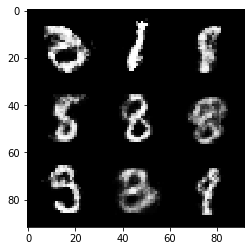

Epoch:134,   G_loss:2.11386483653522,    D_loss:0.6531644500394874


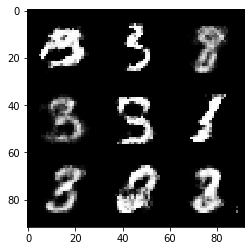

Epoch:135,   G_loss:2.1312631552915837,    D_loss:0.6487190929303037


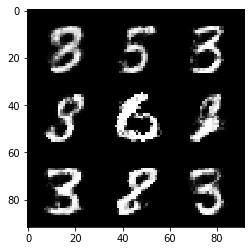

Epoch:136,   G_loss:2.128636249347028,    D_loss:0.6512884879226624


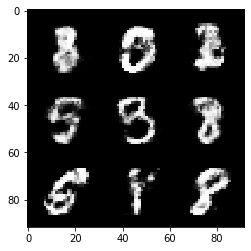

Epoch:137,   G_loss:2.1388846656152687,    D_loss:0.6432136704863262


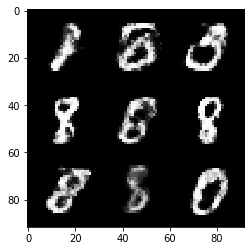

Epoch:138,   G_loss:2.132585692888638,    D_loss:0.6436810587832669


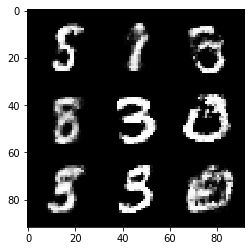

Epoch:139,   G_loss:2.142318559353794,    D_loss:0.6420125533332194


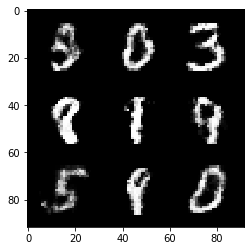

Epoch:140,   G_loss:2.16185211601542,    D_loss:0.6422189314927119


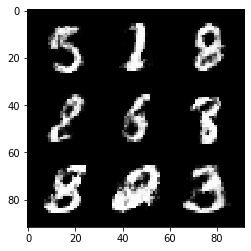

Epoch:141,   G_loss:2.1597374154052247,    D_loss:0.6443647481421672


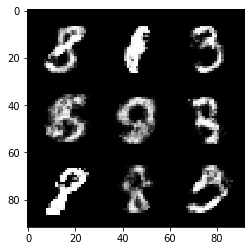

Epoch:142,   G_loss:2.18141425532827,    D_loss:0.6333017184345453


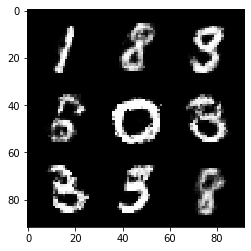

Epoch:143,   G_loss:2.183622933399957,    D_loss:0.63545832403306


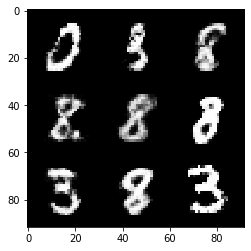

Epoch:144,   G_loss:2.193887476982084,    D_loss:0.6396047446900593


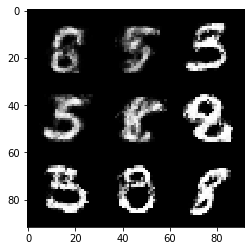

Epoch:145,   G_loss:2.174784448101068,    D_loss:0.6379431948732974


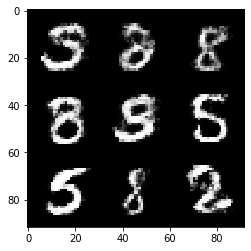

Epoch:146,   G_loss:2.1992595776566057,    D_loss:0.6386493955657426


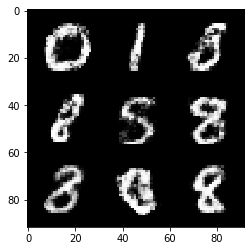

Epoch:147,   G_loss:2.1913357704941396,    D_loss:0.6376905086706443


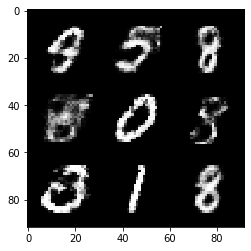

Epoch:148,   G_loss:2.1952887492647557,    D_loss:0.6342660694170609


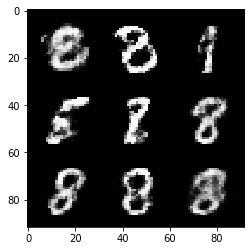

Epoch:149,   G_loss:2.1922736823685898,    D_loss:0.6345720567238102


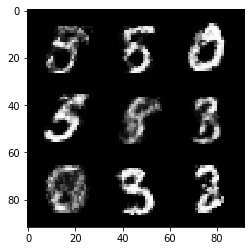

Epoch:150,   G_loss:2.2084108495763117,    D_loss:0.6234630039378778


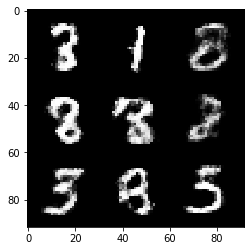

Epoch:151,   G_loss:2.2085038783199495,    D_loss:0.6358121434953421


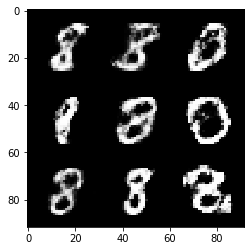

Epoch:152,   G_loss:2.2044279504178177,    D_loss:0.6263991078969512


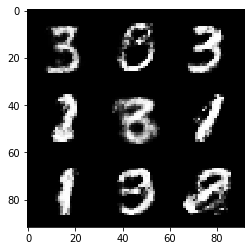

Epoch:153,   G_loss:2.2087642136158974,    D_loss:0.6261532265049562


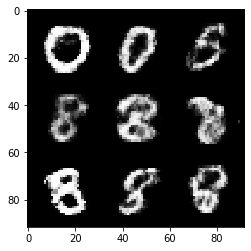

Epoch:154,   G_loss:2.2182995934984575,    D_loss:0.6216410721606537


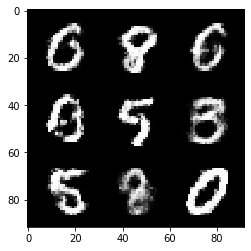

Epoch:155,   G_loss:2.2286167602295053,    D_loss:0.6174323153394118


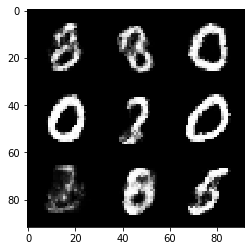

Epoch:156,   G_loss:2.249912990308774,    D_loss:0.6180860107895662


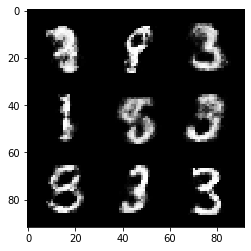

Epoch:157,   G_loss:2.2298716222807795,    D_loss:0.6210788341918225


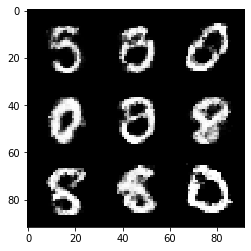

Epoch:158,   G_loss:2.245816236111655,    D_loss:0.6190056104713412


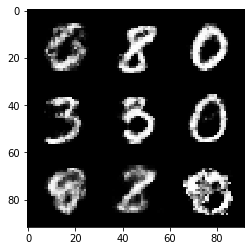

Epoch:159,   G_loss:2.25360431688935,    D_loss:0.6157257782497894


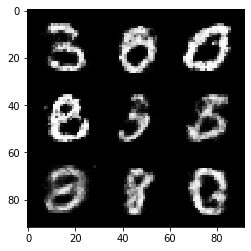

Epoch:160,   G_loss:2.244330006113439,    D_loss:0.621509519530766


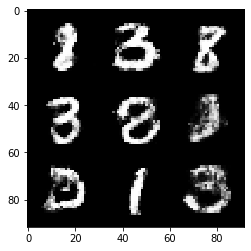

Epoch:161,   G_loss:2.2641028633504026,    D_loss:0.6190236453880379


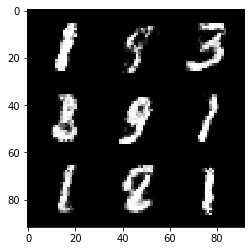

Epoch:162,   G_loss:2.2729271262693507,    D_loss:0.6158119013060385


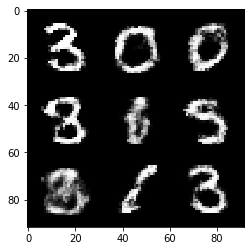

Epoch:163,   G_loss:2.252408515669898,    D_loss:0.6141420737194863


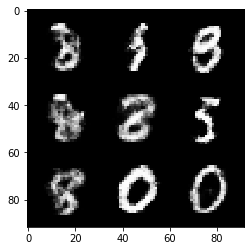

Epoch:164,   G_loss:2.2678214190865376,    D_loss:0.6162022497417576


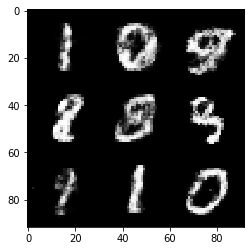

Epoch:165,   G_loss:2.2564384596688405,    D_loss:0.6145054028232468


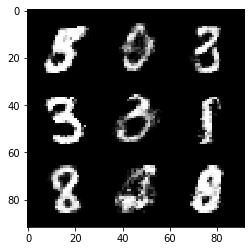

Epoch:166,   G_loss:2.2688560853126463,    D_loss:0.607368820479938


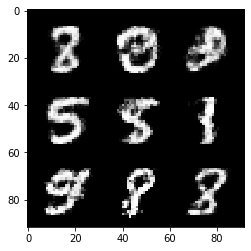

Epoch:167,   G_loss:2.269883207802071,    D_loss:0.6131877007324305


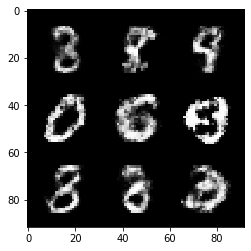

Epoch:168,   G_loss:2.284971293482953,    D_loss:0.6055302056930721


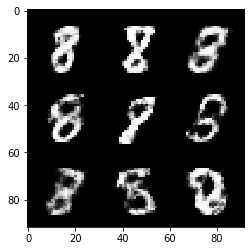

Epoch:169,   G_loss:2.2799784959252203,    D_loss:0.61128700148068


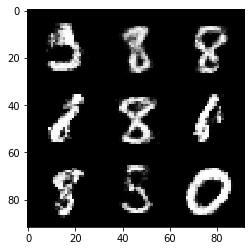

Epoch:170,   G_loss:2.263453518403873,    D_loss:0.6073927394807466


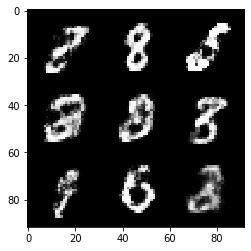

Epoch:171,   G_loss:2.296131421762235,    D_loss:0.6100409364204671


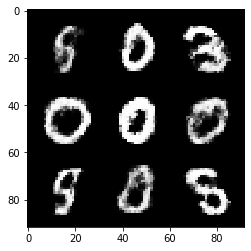

Epoch:172,   G_loss:2.3014515268523046,    D_loss:0.6055817977388276


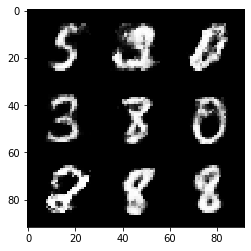

Epoch:173,   G_loss:2.29866280103289,    D_loss:0.6069399162269096


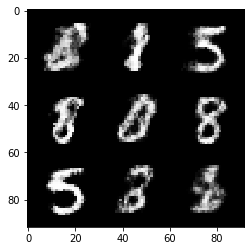

Epoch:174,   G_loss:2.3024721423954344,    D_loss:0.6009142616156068


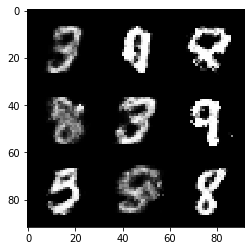

Epoch:175,   G_loss:2.3004382415366833,    D_loss:0.6024488058171547


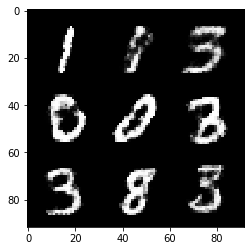

Epoch:176,   G_loss:2.3189265450943255,    D_loss:0.6003491354268243


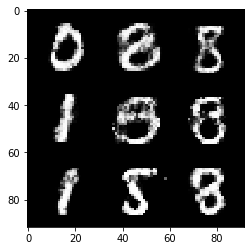

Epoch:177,   G_loss:2.3101190643778233,    D_loss:0.597950077291999


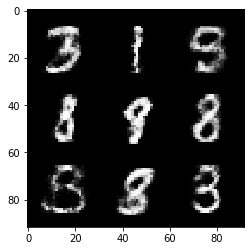

Epoch:178,   G_loss:2.3274601816114333,    D_loss:0.5971097613194349


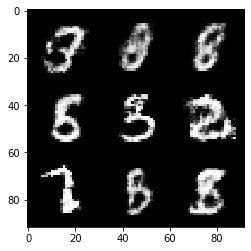

Epoch:179,   G_loss:2.326122138800143,    D_loss:0.5991344504646147


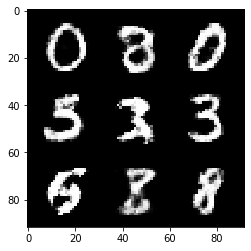

Epoch:180,   G_loss:2.33135166008081,    D_loss:0.5954160079645958


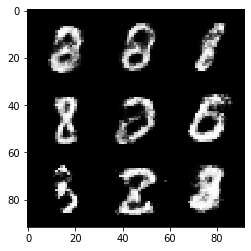

Epoch:181,   G_loss:2.35602270108042,    D_loss:0.5911628940085104


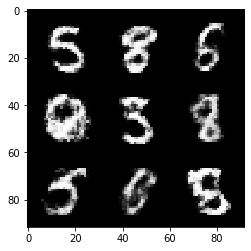

Epoch:182,   G_loss:2.3466500098517202,    D_loss:0.5941696545081352


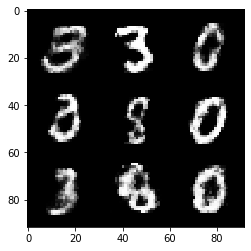

Epoch:183,   G_loss:2.3353646236187866,    D_loss:0.5895011341139706


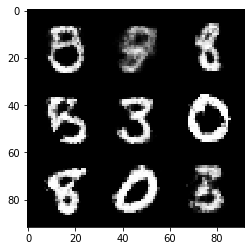

Epoch:184,   G_loss:2.3642167803575234,    D_loss:0.5959649905721262


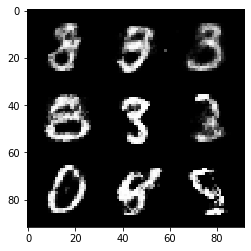

Epoch:185,   G_loss:2.366268274880676,    D_loss:0.5955085380753474


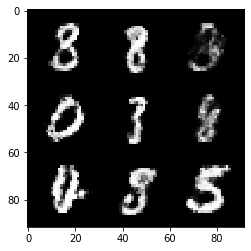

Epoch:186,   G_loss:2.3540766628057974,    D_loss:0.6058825159123712


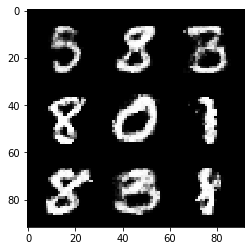

Epoch:187,   G_loss:2.3666612751194154,    D_loss:0.5975843563771197


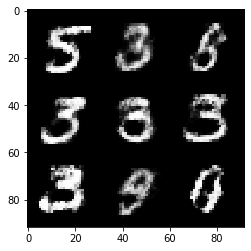

Epoch:188,   G_loss:2.3828080540526906,    D_loss:0.5945584921122614


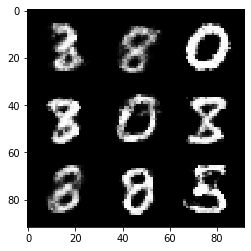

Epoch:189,   G_loss:2.3535340569420917,    D_loss:0.5921786533299286


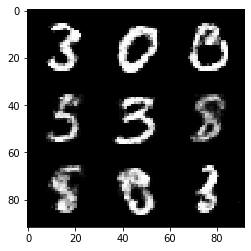

Epoch:190,   G_loss:2.3687160411623243,    D_loss:0.5904404725601424


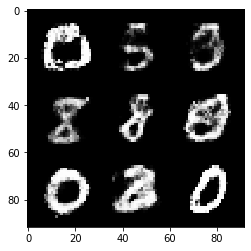

Epoch:191,   G_loss:2.364311435075203,    D_loss:0.5880952413275298


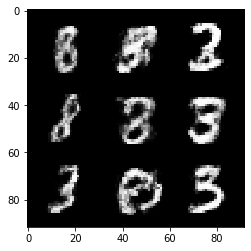

Epoch:192,   G_loss:2.370801143046381,    D_loss:0.5947035720099264


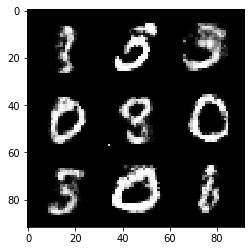

Epoch:193,   G_loss:2.3760717176933532,    D_loss:0.5961153426213559


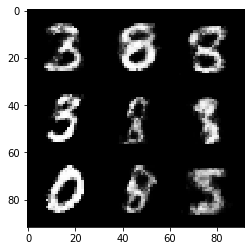

Epoch:194,   G_loss:2.3712228357410634,    D_loss:0.5862033924441348


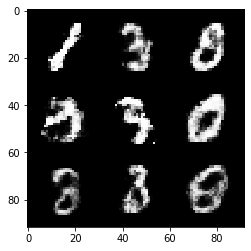

Epoch:195,   G_loss:2.3766817224305323,    D_loss:0.5860275718004211


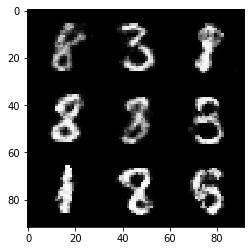

Epoch:196,   G_loss:2.386093406407818,    D_loss:0.589084298784799


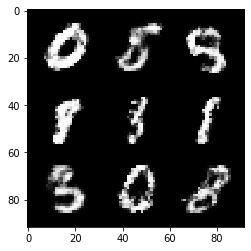

Epoch:197,   G_loss:2.393729075312869,    D_loss:0.5832936195358793


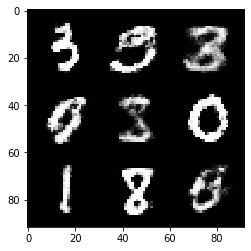

Epoch:198,   G_loss:2.4217610440528725,    D_loss:0.5793773788950844


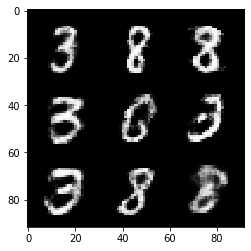

Epoch:199,   G_loss:2.3979288249381825,    D_loss:0.5831817487028362


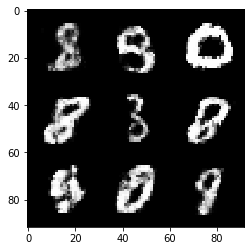

In [40]:
for epoch in range(200):
    G_loss_run = 0.0
    D_loss_run = 0.0
    for i, data in enumerate(trainLoader):
        X, _ = data
        X = X.view(X.size(0), -1).to(device)
        mb_size = X.size(0)
        
        one_labels = torch.ones(mb_size, 1).to(device)
        zero_labels = torch.zeros(mb_size, 1).to(device)
        
        z = torch.randn(mb_size, Z_dim).to(device)
        
        D_real = D(X)
        D_fake = D(G(z))
        
        D_real_loss = F.binary_cross_entropy(D_real, one_labels)
        D_fake_loss = F.binary_cross_entropy(D_fake, zero_labels)
        D_loss = D_real_loss + D_fake_loss
        
        d_opt.zero_grad()
        D_loss.backward()
        d_opt.step()
        
        z = torch.randn(mb_size, Z_dim).to(device)
        D_fake = D(G(z))
        G_loss = F.binary_cross_entropy(D_fake, one_labels)
        
        g_opt.zero_grad()
        G_loss.backward()
        g_opt.step()
        
        G_loss_run += G_loss.item()
        D_loss_run += D_loss.item()
        
    print('Epoch:{},   G_loss:{},    D_loss:{}'.format(epoch, G_loss_run/(i+1), D_loss_run/(i+1)))
    
    z = Variable(torch.randn(9, 100)).cuda()
    sample_images = G(z).unsqueeze(1).data.cpu()
    sample_images = sample_images.view(sample_images.size(0), 1, 28, 28)
    grid = make_grid(sample_images, nrow=3, normalize=True).permute(1,2,0).numpy()
    plt.imshow(grid)
    plt.show()